In [19]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
sys.path.append('./../../designer/script/')
sys.path.append('./../')
sys.path.append('./../../')
from film import TwoMaterialFilm
from spectrum import Spectrum
from design import BaseDesign
import os
import torch

from analyze_utils.structure import plot_layer_thickness
import dill
import tqdm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:

init_ots = np.arange(1, 10000, 200)
layer_numbers = [190, 90, 40]
rep_numbers = np.arange(1)

losses, layers, ots = [], [], []
for layer_number in layer_numbers:

    losses.append([])
    ots.append([])
    layers.append([])
    for rep in rep_numbers:

        for init_ot in tqdm.tqdm(init_ots[:]):
            try:
                with open(f'./raw_result/three_line_filter/SiO2_TiO2-400to700nm/ot{init_ot}_layer{layer_number}_rep{rep}_design.pkl', 'rb') as f:
                    design = dill.load(f)
            except Exception:
                continue
            losses[-1].append(design.training_info[-1]['film'])
            ots[-1].append(design.film.get_optical_thickness(500))
            layers[-1].append(torch.count_nonzero(torch.tensor(design.film.get_d()) > 0).item())
        


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [01:20<00:00,  1.60s/it]


/tmp/ipykernel_18301/4017012114.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('cividis')


Text(0.5, 0, 'Initial Optical Thickness (OT)')

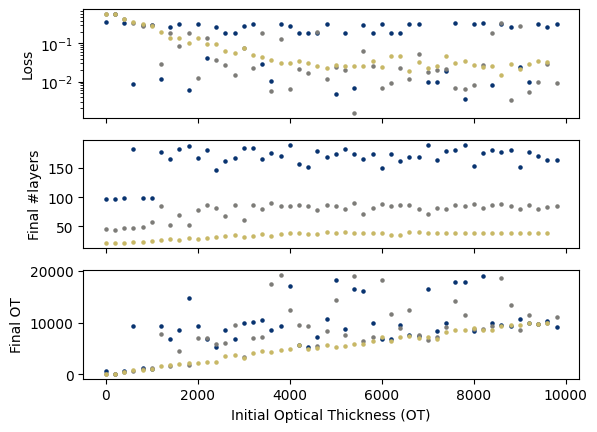

In [27]:
import matplotlib
cmap = matplotlib.cm.get_cmap('cividis')

c1 = cmap(0.1)
c2 = cmap(0.5)
c3 = cmap(0.8)
c = [c1, c2, c3]
fig, ax = plt.subplots(3, 1, sharex=True)

for i in range(3):
    layer_num = layer_numbers[i]
    ot = ots[i]
    l = losses[i]
    n = layers[i]
    ax[0].scatter(np.arange(1, 10000, 200)[:len(ot)], l, label=f'Initial #layer: {layer_num}',color=c[i], s=5)
    
    ax[1].scatter(np.arange(1, 10000, 200)[:len(ot)], n, label=f'Initial #layer: {layer_num}',color=c[i], s=5)

    ax[2].scatter(np.arange(1, 10000, 200)[:len(ot)], ot, label=f'Initial #layer: {layer_num}',color=c[i], s=5)
    
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Final #layers')
ax[2].set_ylabel('Final OT')

ax[0].set_yscale('log')
ax[2].set_xlabel('Initial Optical Thickness (OT)')

In [23]:
print([0][0].get_d())

AttributeError: 'numpy.float64' object has no attribute 'get_d'